<a href="https://colab.research.google.com/github/guilherber/guilherber/blob/master/Mapa_de_vetores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Análise Sinótica da Malha Urbana de Piracicaba/SP




O presente projeto possui como objetivo realizar uma análise sinótica diária do perímetro urbano de Piracicaba através da manipulação de vetores de direção do vento em função de seu ângulo.

Os dados foram obtidos através da estação meteorológica de Piracicaba, localizado pelas seguintes coordenadas:

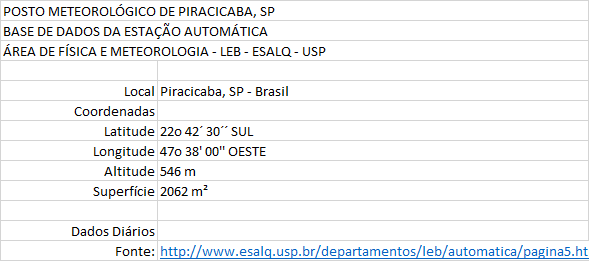



















#Pacotes instalados

In [97]:
#O comando "pip" instala os pacotes necessários para análise dos dados obtidos através do banco de dados da ESALQ/USP
!pip install scitools-iris
!pip install numpy --upgrade
!pip install iris-sample-data
!pip install python-dateutil
!pip install pandas
!pip install sktlearn
!pip install statsmodels
!pip install contextily
!pip install seaborn
!pip install geopandas
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement sktlearn (from versions: none)
ERROR: No matching distribution found for sktlearn
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.

In [98]:
import pandas as pd
import geopandas
import matplotlib.pyplot as plt
import contextily as cx
import io
import geopandas as gpd
import iris
import iris.coord_categorisation
import iris.quickplot as qplt
import iris.pandas
import cartopy
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import pyplot as plt

import cartopy.crs as ccrs
import seaborn as sns 
from statsmodels.tsa.stattools import adfuller

#Modelagem e obtenção dos dados

In [4]:
df = pd.DataFrame(
    {'County': ['Piracicaba'],
     'Latitude': [-22.66],
     'Longitude': [-47.72]})

In [5]:
gdf = geopandas.GeoDataFrame(
    df, geometry=geopandas.points_from_xy(df.Longitude, df.Latitude))

In [6]:
print(gdf.head())

       County  Latitude  Longitude                     geometry
0  Piracicaba    -22.66     -47.72  POINT (-47.72000 -22.66000)


In [14]:
df1 = pd.read_csv('/content/Teste1.csv')
print(df1)

           TIMESTAMP  RECORD  BattV_Avg  Tar_AVG  UR_inst  Vvento_ms_AVG  \
0    12/31/2021 0:00   32869      10.32    20.09     95.4           0.00   
1    12/31/2021 0:15   32870      10.31    20.01     96.5           0.15   
2    12/31/2021 0:30   32871      10.30    19.94     96.7           0.00   
3    12/31/2021 0:45   32872      10.30    20.05     96.2           0.00   
4    12/31/2021 1:00   32873      10.29    20.15     96.1           0.00   
..               ...     ...        ...      ...      ...            ...   
190                0       0       0.00     0.00      0.0           0.00   
191                0       0       0.00     0.00      0.0           0.00   
192                0       0       0.00     0.00      0.0           0.00   
193                0       0       0.00     0.00      0.0           0.00   
194                0       0       0.00     0.00      0.0           0.00   

     Dvento_G  Qg_AVG  PAR_AVG  Rn_Avg  ...  Qsup_AVG  Boc_AVG  Bol_AVG  \
0      135.9

In [8]:
print (df.dtypes)

County         object
Latitude      float64
Longitude     float64
geometry     geometry
dtype: object


In [9]:
cidade_pira = gpd.read_file('/content/Cidadepira.shp')

In [10]:
af = cidade_pira["geometry"].apply(lambda p: list(p.exterior.coords)).explode().apply(pd.Series).rename(columns=({0:"x", 1:"y"}))

In [11]:
af

,x,y
0,-47.644908,-22.767681
0,-47.647719,-22.767385
0,-47.648159,-22.765031
0,-47.646926,-22.763351
0,-47.650298,-22.760940
...,...,...
0,-47.637063,-22.765388
0,-47.638450,-22.766009
0,-47.640856,-22.766650
0,-47.642636,-22.766806


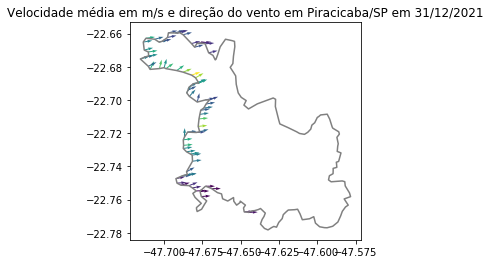

In [206]:
lon= af.x
lat= af.y
m = df1['Vvento_ms_AVG']
u= df1['Dvento_D1_WVT']
v= df1['Dvento_SD1_WVT']
u_norm = u / np.sqrt(u ** 2.0 + v ** 2.0)
v_norm = v / np.sqrt(u ** 2.0 + v ** 2.0)

fig, ax = plt.subplots()
q = ax.quiver(lon, lat, u_norm, v_norm, m)

plt.title("Velocidade média em m/s e direção do vento em Piracicaba/SP em 31/12/2021")
cidade_pira.boundary.plot(ax=ax, color='gray', zorder=2)


Text(0.5, 1.0, 'Velocidade média em m/s e direção do vento em Piracicaba/SP em 31/12/2021')

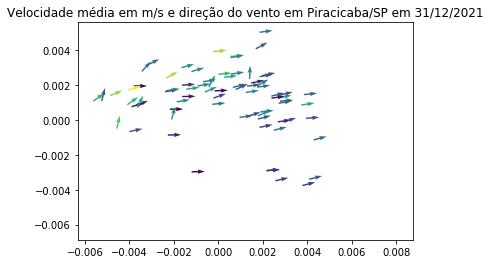

In [207]:
lon= np.gradient(af.x)
lat= np.gradient(af.y)
m = df1['Vvento_ms_AVG']
u= df1['Dvento_D1_WVT']
v= df1['Dvento_SD1_WVT']
u_norm = u / np.sqrt(u ** 2.0 + v ** 2.0)
v_norm = v / np.sqrt(u ** 2.0 + v ** 2.0)

fig, ax = plt.subplots()
q = ax.quiver(lon, lat, u_norm, v_norm, m)

plt.title("Velocidade média em m/s e direção do vento em Piracicaba/SP em 31/12/2021")